<a href="https://colab.research.google.com/github/DikshaMathankar/Stress_Detection_Project/blob/main/Stress_Detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def preprocess_data(data):
    X = []
    y = []
    for index, row in data.iterrows():
        pixels = row['pixels'].split(' ')
        X.append(np.array(pixels, dtype='float32').reshape(48, 48, 1))  # 48x48 is the size of the image
        y.append(row['emotion'])

    X = np.array(X)
    X = X / 255.0  # Normalize the pixel values to be between 0 and 1
    y = to_categorical(np.array(y), num_classes=7)  # 7 emotion classes

    return X, y

# Load the data into a pandas DataFrame
data = pd.read_csv("/content/fer2013.csv.zip")

# Split into training and validation sets
train_data = data[data['Usage'] == 'Training']
val_data = data[data['Usage'] == 'PublicTest']

# Preprocess the data
X_train, y_train = preprocess_data(train_data)
X_val, y_val = preprocess_data(val_data)

# Define the CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 emotion classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=64)

# Save the trained model
model.save('my_model.keras')

# Load the pre-trained model (for later use)
model = keras.models.load_model('my_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.2489 - loss: 1.8216 - val_accuracy: 0.3906 - val_loss: 1.5918
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3800 - loss: 1.5827 - val_accuracy: 0.4667 - val_loss: 1.4089
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4422 - loss: 1.4523 - val_accuracy: 0.4985 - val_loss: 1.3372
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4823 - loss: 1.3693 - val_accuracy: 0.5149 - val_loss: 1.2786
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5034 - loss: 1.3137 - val_accuracy: 0.5244 - val_loss: 1.2499
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5234 - loss: 1.2636 - val_accuracy: 0.5224 - val_loss: 1.2179
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5412 - loss: 1.2155 - val_accuracy: 0.5341 - val_loss: 1.2019
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5534 - loss: 1.1819 - val_accuracy: 

In [10]:
import matplotlib.pyplot as plt

# Load the dataset (assumes the FER2013 CSV file is in the current directory)
# Adjust the path as necessary
df = pd.read_csv(r'/content/fer2013.csv.zip') # Assuming this is the path used in previous cells

# Mapping emotion labels to their corresponding names (assuming labels from 0 to 6)
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Add a new column with emotion names based on the emotion label
df['emotion_name'] = df['emotion'].map(emotion_labels) # Use 'df' instead of 'model'

# Calculate the total number of images per emotion
emotion_counts = df['emotion_name'].value_counts() # Use 'df' instead of 'model'

# Display the counts
print(emotion_counts)

emotion_name
Happy       8989
Neutral     6198
Sad         6077
Fear        5121
Angry       4953
Surprise    4002
Disgust      547
Name: count, dtype: int64


In [11]:
# Emotion labels as per the FER2013 dataset
# Map each emotion to a stress level (low, moderate, high)
emotion_to_stress = {
    'Angry': 'High Stress',
    'Disgust': 'Moderate Stress',
    'Fear': 'High Stress',
    'Happy': 'Low Stress',
    'Sad': 'Moderate Stress',
    'Surprise': 'Low Stress',
    'Neutral': 'Low Stress'
}


Saving photo2.jpg to photo2 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


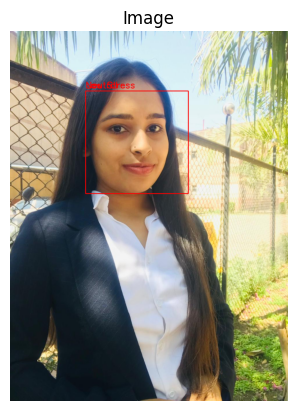

In [13]:
import matplotlib.pyplot as plt

from google.colab import files
uploaded_image = files.upload()  # Upload an image for testing

from PIL import Image
from io import BytesIO

# Load the uploaded image
image_path = list(uploaded_image.keys())[0]
image = Image.open(BytesIO(uploaded_image[image_path]))

# Convert the image to a NumPy array before any processing
image_np = np.array(image) # Convert the PIL Image to a NumPy array
gray_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)

# Assuming the face cascade is already loaded
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in faces:
    roi_gray = gray_image[y:y + h, x:x + w]
    roi_gray = cv2.resize(roi_gray, (48, 48))
    roi_gray = roi_gray.astype('float32') / 255.0
    roi_gray = np.expand_dims(roi_gray, axis=-1)
    roi_gray = np.expand_dims(roi_gray, axis=0)

    # Predict the emotion
    prediction = model.predict(roi_gray)
    max_index = np.argmax(prediction[0])
    emotion = emotion_labels[max_index]
    stress_level = emotion_to_stress[emotion]

    # Draw a rectangle and add the label on the NumPy array representation of the image
    cv2.rectangle(image_np, (x, y), (x + w, y + h), (255, 0, 0), 2) # Use image_np instead of image
    #cv2.putText(image_np, f"{emotion, stress_level}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  # Use image_np instead of image
    cv2.putText(image_np, f"{emotion}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.putText(image_np, f"{stress_level}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

def show_image(image, title='Image'):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
# Display the image with detected faces and emotion labels
show_image(image_np) # Use image_np instead of image

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

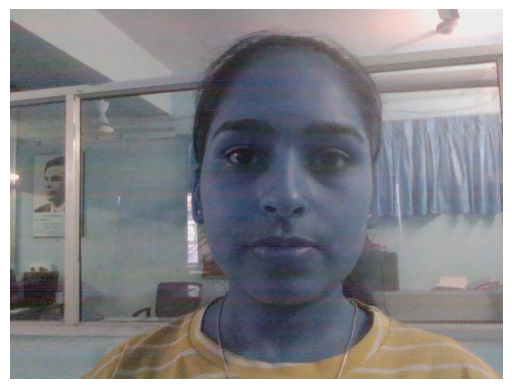

In [20]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from PIL import Image
import io
import base64  # Import base64 module

# Request webcam permission
display(Javascript('''
navigator.mediaDevices.getUserMedia({ video: true }).then(stream => {
  // Access the webcam stream here (optional)
  // ...

  // Stop the stream when you're done
  stream.getTracks().forEach(track => track.stop());
}).catch(err => {
  console.error("Error accessing webcam:", err);
});
'''))

# JavaScript code to capture image from webcam
def capture_image():
    js = Javascript('''
        async function captureImage() {
            const video = document.createElement('video');
            const canvas = document.createElement('canvas');
            const context = canvas.getContext('2d');
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(video);
            video.srcObject = stream;
            await new Promise((resolve) => video.onloadedmetadata = resolve);
            video.play();

            // Resize canvas to video size
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            context.drawImage(video, 0, 0, canvas.width, canvas.height);

            stream.getTracks().forEach(track => track.stop());
            video.remove();

            return canvas.toDataURL('image/png');
        }
        captureImage();
    ''')

    display(js)
    data = eval_js("captureImage();")
    return data

# Function to convert base64 image to OpenCV format
def base64_to_image(base64_str):
    image_data = base64_str.split(',')[1]
    image_bytes = io.BytesIO(base64.b64decode(image_data)) # Use base64.b64decode
    img = Image.open(image_bytes)
    return np.array(img)

# Capture an image from webcam
image_data = capture_image()

# Convert captured image to OpenCV format
img = base64_to_image(image_data)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the captured image
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


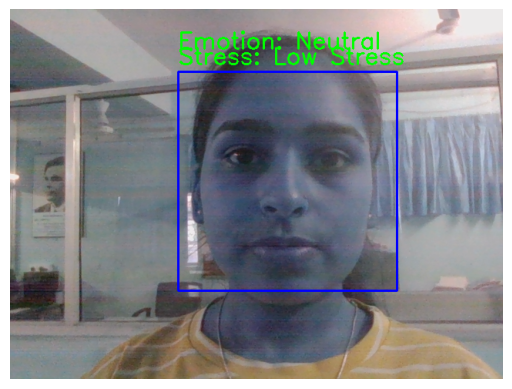

In [21]:
# Load OpenCV's Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in faces:
    roi_gray = gray_image[y:y + h, x:x + w]
    roi_gray = cv2.resize(roi_gray, (48, 48))  # Resize to match input size for the model
    roi_gray = roi_gray.astype('float32') / 255.0  # Normalize
    roi_gray = np.expand_dims(roi_gray, axis=-1)  # Add channel dimension
    roi_gray = np.expand_dims(roi_gray, axis=0)  # Add batch dimension

    # Predict the emotion
    prediction = model.predict(roi_gray)
    max_index = np.argmax(prediction[0])
    emotion = emotion_labels[max_index]

    # Map the emotion to a stress level
    stress_level = emotion_to_stress[emotion]

    # Draw a rectangle around the face and display the emotion and stress level
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.putText(img, f'Emotion: {emotion}', (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(img, f'Stress: {stress_level}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display the image with detected face, emotion and stress level
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


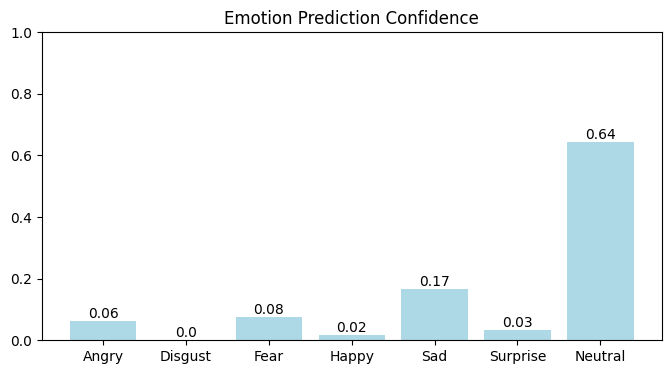

In [22]:
import ipywidgets as widgets
from IPython.display import display

def draw_bar_chart(emotion_confidences, emotion_labels):
    fig, ax = plt.subplots(figsize=(8, 4))

    # Access confidence values from prediction
    confidence_values = emotion_confidences.flatten()

    # Create a bar chart for emotion confidence scores
    bars = ax.bar(emotion_labels, confidence_values, color='lightblue')

    # Add value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),ha='center', va='bottom')

    ax.set_title("Emotion Prediction Confidence")
    ax.set_ylim([0, 1])  # Confidence is between 0 and 1
    plt.show()

# Pass the predicted values (emotion_confidences) for the bar chart
emotion_confidences = prediction[0]  # This is the predicted output confidences for the first face
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']  # Labels for FER2013 emotions

predicted_stress_level = stress_level  # Replace with your actual stress level prediction

# Create the widgets to display both elements
draw_bar_chart(emotion_confidences, emotion_labels)



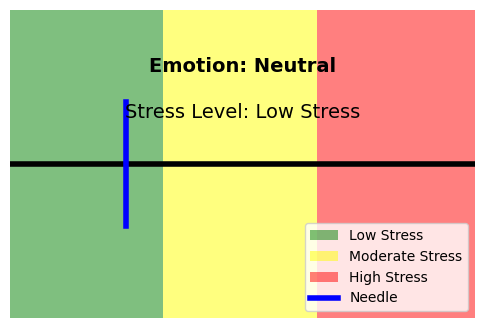

In [23]:
# Stress level mapping to a scale value (0 to 100)
def get_stress_scale_value(stress_level):
    if stress_level == "Low Stress":
        return 25  # Low stress
    elif stress_level == "Moderate Stress":
        return 50  # Moderate stress
    elif stress_level == "High Stress":
        return 75  # High stress
    else:
        return 0  # Default value

# Function to draw a multimeter-like line meter for stress level
def draw_multimeter(emotion, stress_level):
    fig, ax = plt.subplots(figsize=(6, 4))

    # Define the range for the multimeter (0 to 100)
    ax.plot([0, 100], [0, 0], color='black', lw=4)

    # Color regions for low, moderate, and high stress
    ax.axvspan(0, 33, facecolor='green', alpha=0.5, label="Low Stress")       # Low stress region (green)
    ax.axvspan(33, 66, facecolor='yellow', alpha=0.5, label="Moderate Stress")  # Moderate stress region (yellow)
    ax.axvspan(66, 100, facecolor='red', alpha=0.5, label="High Stress")      # High stress region (red)

    # Plot the needle for the stress level
    stress_value = get_stress_scale_value(stress_level)
    ax.plot([stress_value, stress_value], [-0.2, 0.2], color='blue', lw=4, label="Needle")  # Needle line

    # Display emotion and stress level
    ax.text(50, 0.3, f"Emotion: {emotion}", horizontalalignment='center', fontsize=14, fontweight="bold")
    ax.text(50, 0.15, f"Stress Level: {stress_level}", horizontalalignment='center', fontsize=14, color="black")

    # Set x and y limits
    ax.set_xlim(0, 100)
    ax.set_ylim(-0.5, 0.5)

    # Remove unnecessary parts of the plot
    ax.axis("off")  # Hide the axes for a cleaner look

    # Add a legend for the stress regions
    ax.legend(loc='lower right')

    plt.show()

# Example usage with predicted emotion and stress level
predicted_emotion = emotion  # Replace this with the actual predicted emotion
predicted_stress_level = stress_level  # Replace this with the actual predicted stress level

# Draw the multimeter-like line meter
draw_multimeter(predicted_emotion, predicted_stress_level)


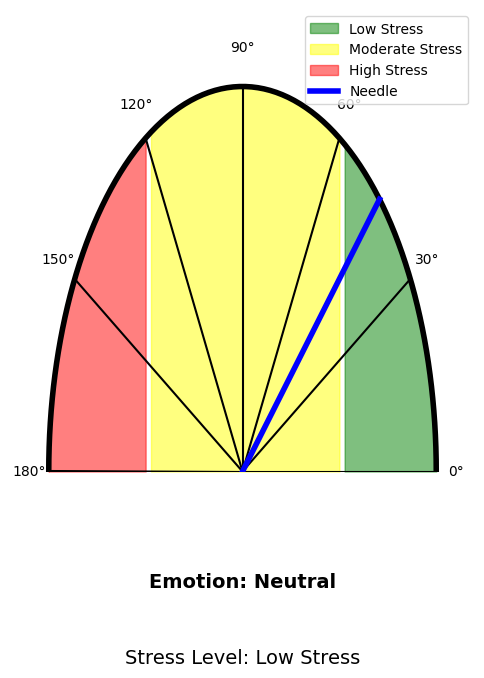

In [24]:
# Mapping stress level to degrees on the half-circle
def get_stress_degree(stress_level):
    if stress_level == "Low Stress":
        return 45  # Low stress (~45 degrees)
    elif stress_level == "Moderate Stress":
        return 90  # Moderate stress (~90 degrees)
    elif stress_level == "High Stress":
        return 135  # High stress (~135 degrees)
    else:
        return 0  # Default (no stress level detected)

# Function to create a half-circle gauge meter for stress level
def draw_half_circle_gauge(emotion, stress_level):
    fig, ax = plt.subplots(figsize=(6, 6))

    # Define the angles for the half-circle (0 to 180 degrees)
    theta = np.linspace(0, np.pi, 100)
    radius = np.ones_like(theta)

    # Draw the base of the half-circle
    ax.plot(np.cos(theta), np.sin(theta), lw=4, color='black')

    # Color regions for stress (green for low, yellow for moderate, red for high)
    ax.fill_between(np.cos(theta[:33]), 0, np.sin(theta[:33]), color='green', alpha=0.5, label="Low Stress")
    ax.fill_between(np.cos(theta[33:66]), 0, np.sin(theta[33:66]), color='yellow', alpha=0.5, label="Moderate Stress")
    ax.fill_between(np.cos(theta[66:]), 0, np.sin(theta[66:]), color='red', alpha=0.5, label="High Stress")

    # Draw degree markings and labels (0° to 180°)
    for angle in range(0, 181, 30):
        radian = np.deg2rad(angle)
        ax.plot([0, np.cos(radian)], [0, np.sin(radian)],color='black')
        ax.text(1.1 * np.cos(radian), 1.1 * np.sin(radian), f"{angle}°", ha='center', va='center', fontsize=10)

    # Plot the needle based on stress level (rotate to the corresponding degree)
    stress_degree = get_stress_degree(stress_level)
    radian = np.deg2rad(stress_degree)
    ax.plot([0, np.cos(radian)], [0, np.sin(radian)], lw=4, color='blue', label="Needle")

    # Display emotion and stress level labels
    ax.text(0, -0.3, f"Emotion: {emotion}", horizontalalignment='center', fontsize=14, fontweight='bold')
    ax.text(0, -0.5, f"Stress Level: {stress_level}", horizontalalignment='center', fontsize=14, color='black')

    # Set limits and remove axes
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([0, 1.2])
    ax.axis('off')  # Turn off axis for cleaner look

    plt.legend(loc='upper right')
    plt.show()

# Example usage with predicted emotion and stress level
predicted_emotion = emotion  # Replace with actual predicted emotion
predicted_stress_level = stress_level  # Replace with actual predicted stress level

# Draw the half-circle gauge meter
draw_half_circle_gauge(predicted_emotion, predicted_stress_level)

In [25]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,067,543 (4.07 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 711,696 (2.71 MB)

In [28]:
from sklearn.metrics import accuracy_score
# Make predictions on validation data
y_pred_prob = model.predict(X_val)  # Get probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_val, axis=1)  # Get true labels

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Test Accuracy: 55.64%


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


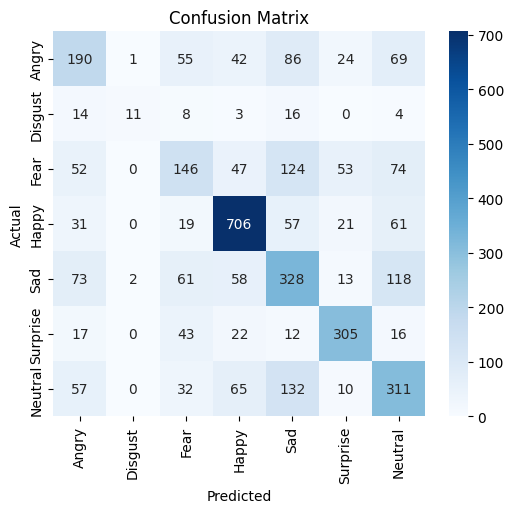

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure y_true and y_pred are correctly extracted
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to labels
y_true = np.argmax(y_val, axis=1)  # Convert one-hot to labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [30]:
# Print classification report
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=emotion_labels))



              precision    recall  f1-score   support

       Angry       0.44      0.41      0.42       467
     Disgust       0.79      0.20      0.31        56
        Fear       0.40      0.29      0.34       496
       Happy       0.75      0.79      0.77       895
         Sad       0.43      0.50      0.47       653
    Surprise       0.72      0.73      0.73       415
     Neutral       0.48      0.51      0.49       607

    accuracy                           0.56      3589
   macro avg       0.57      0.49      0.50      3589
weighted avg       0.55      0.56      0.55      3589



Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7215 - loss: 0.7145 - val_accuracy: 0.5656 - val_loss: 1.4140
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7236 - loss: 0.7044 - val_accuracy: 0.5578 - val_loss: 1.3914
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7277 - loss: 0.6975 - val_accuracy: 0.5631 - val_loss: 1.4576
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7380 - loss: 0.6707 - val_accuracy: 0.5637 - val_loss: 1.5111
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7416 - loss: 0.6579 - val_accuracy: 0.5542 - val_loss: 1.5288
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7475 - loss: 0.6379 - val_accuracy: 0.5639 - val_loss: 1.5806
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7459 - loss: 0.6367 - val_accuracy: 0.5570 - val_loss: 1.6115
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7529 - loss: 0.6184 - val_accuracy: 0

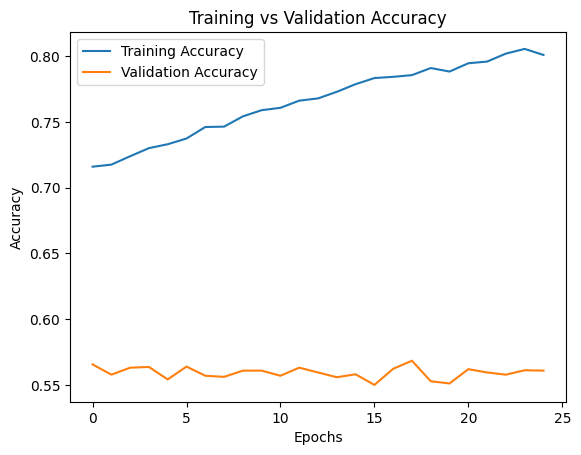

In [31]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=64)
# Plot accuracy trends
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
